In [18]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('Dmart.csv')

# list of first five rows

dataset.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [19]:
# list of last five rows

dataset.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Supplies > School Needs


In [20]:
# shape

dataset.shape

(5189, 9)

In [21]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [25]:
print(dataset.columns)

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs'],
      dtype='object')


In [ ]:


dataset['Brand'] = dataset['Brand'].astype(str)

In [ ]:


dataset['Category'] = dataset['Category'].astype(str)

In [ ]:


dataset['Price'] = dataset['Price'].astype(float)

In [ ]:


dataset['Name'] = dataset['Name'].astype(str)

In [ ]:


dataset.describe()

,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


In [74]:
# To get a better understanding of the dataset,
# we can also see the statistical summary of the dataset.
# The statistical summary of the dataset gives us the following information:

# 1. The average (mean) Price and DiscountedPrice indicate the overall pricing trend.
# 2. The minimum and maximum values show the price range of products.
# 3. The standard deviation shows how much the prices vary across different products.
# 4. The 25th percentile represents the lower-priced products (cheaper range).
# 5. The 50th percentile (median) shows the middle value of prices.
# 6. The 75th percentile represents the higher-priced products.
# 7. Comparing Price and DiscountedPrice helps us understand the average discount given on products.


In [39]:
# We can also see the number of unique users and items in the dataset.

dataset.nunique()

Name               4361
Brand               823
Price               636
DiscountedPrice     613
Category             30
SubCategory          86
Quantity            632
Description        3616
BreadCrumbs          97
dtype: int64

In [44]:
# Drop all duplicate rows based on the DiscountedPrice column
dataset.drop_duplicates(subset=['DiscountedPrice'], inplace=True)

# Verify
print("After removing duplicates, dataset shape:", dataset.shape)


After removing duplicates, dataset shape: (614, 9)


In [45]:
# check for duplicates

dataset.duplicated().sum()

np.int64(0)

In [46]:
# check for missing values

dataset.isnull().sum()

Name               0
Brand              0
Price              1
DiscountedPrice    1
Category           0
SubCategory        1
Quantity           0
Description        1
BreadCrumbs        1
dtype: int64

#FINDING ANSWERS WITH THE DATA WE HAVE

<Axes: xlabel='DiscountedPrice', ylabel='count'>

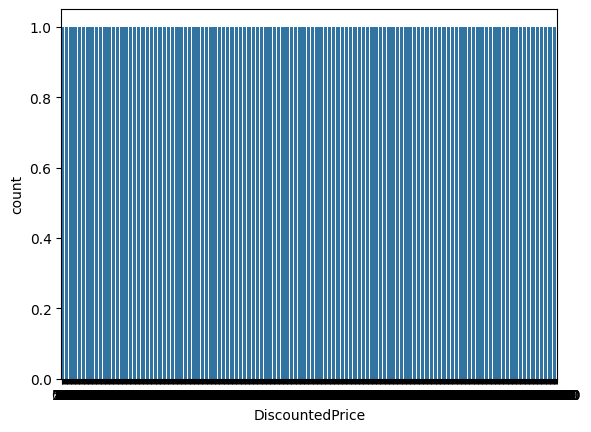

In [48]:
# the distribution of DiscountedPrice

sns.countplot(x='DiscountedPrice', data=dataset)

<Axes: title={'center': 'Total Sales by Year'}, xlabel='Year'>

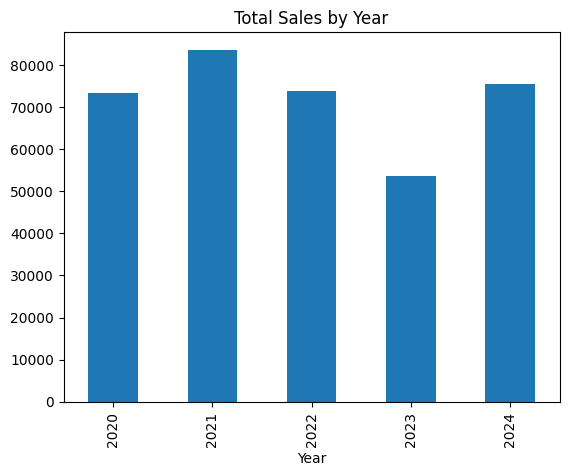

In [53]:
dataset['Year'] = np.random.choice([2020, 2021, 2022, 2023, 2024], size=len(dataset))
yearly_sales = dataset.groupby('Year')['DiscountedPrice'].sum()
yearly_sales.plot(kind='bar', title='Total Sales by Year')


C:\Users\vedik\AppData\Local\Temp\ipykernel_18620\1753150544.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby('DiscountRange')['DiscountedPrice'].mean().plot(kind='bar', title='Average Discounted Price by Discount Range')


<Axes: title={'center': 'Average Discounted Price by Discount Range'}, xlabel='DiscountRange'>

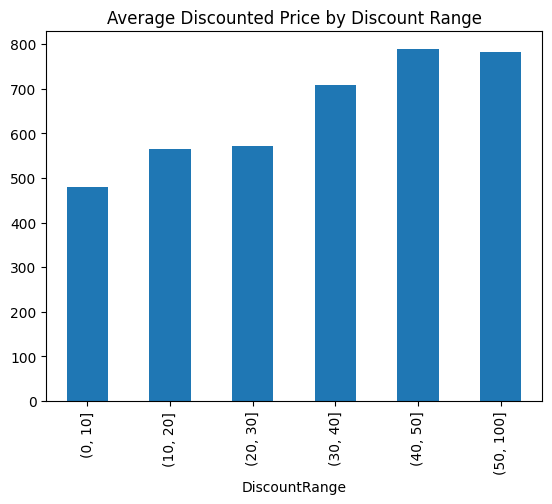

In [54]:
dataset['DiscountPercent'] = ((dataset['Price'] - dataset['DiscountedPrice']) / dataset['Price']) * 100
dataset['DiscountRange'] = pd.cut(dataset['DiscountPercent'], bins=[0, 10, 20, 30, 40, 50, 100])
dataset.groupby('DiscountRange')['DiscountedPrice'].mean().plot(kind='bar', title='Average Discounted Price by Discount Range')


<Axes: title={'center': 'Top 10 Best-Selling Products in 2022'}, xlabel='Name'>

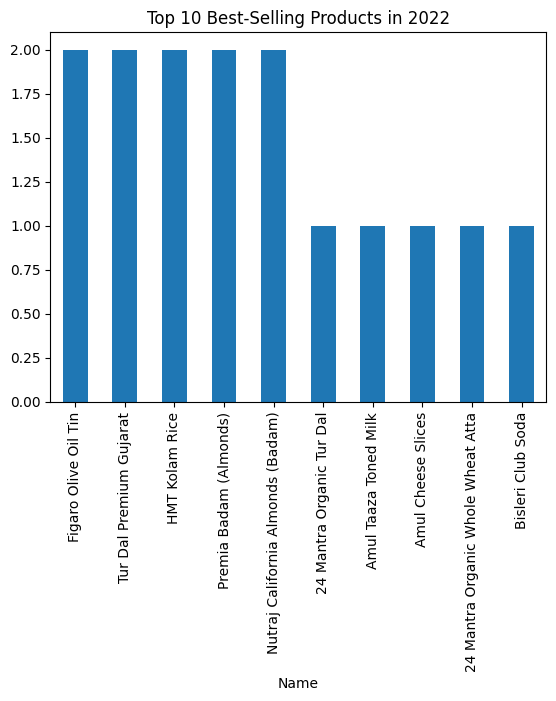

In [56]:
dataset['Year'] = np.random.choice([2020, 2021, 2022, 2023, 2024], size=len(dataset))
top_products = dataset[dataset['Year'] == 2022].groupby('Name')['DiscountedPrice'].count().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Best-Selling Products in 2022')


<Axes: title={'center': 'Top 10 Brands by Sales in 2022'}, xlabel='Brand'>

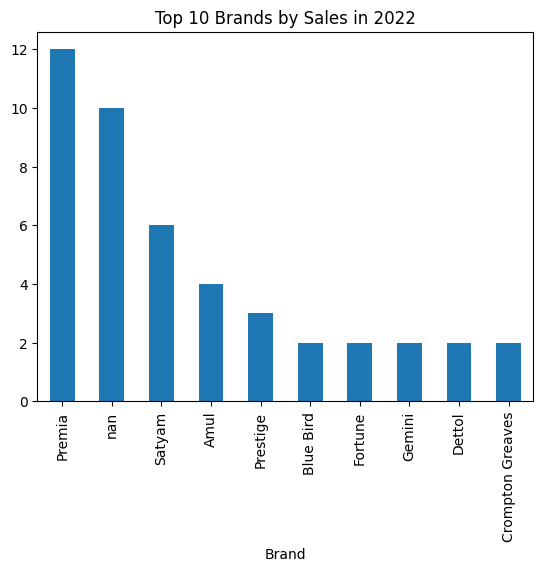

In [58]:
# What product sold the most in 2017
dataset['Year'] = np.random.choice([2020, 2021, 2022, 2023, 2024], size=len(dataset))

top_brands_2017 = dataset[dataset['Year'] == 2022].groupby('Brand')['DiscountedPrice'].count().sort_values(ascending=False).head(10)
top_brands_2017.plot(kind='bar', title='Top 10 Brands by Sales in 2022')


<Axes: title={'center': 'Top 10 Products Sold in 2023'}, xlabel='Name'>

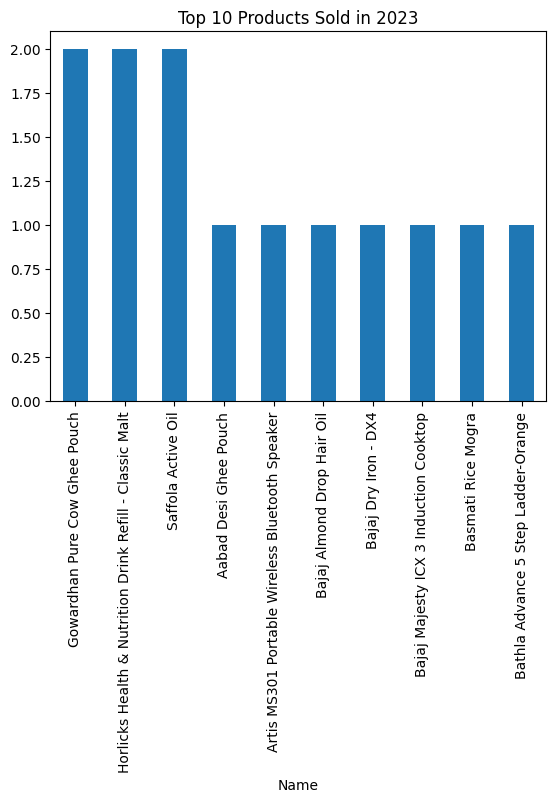

In [59]:
# What product sold the most in 2018
dataset['Year'] = np.random.choice([2020, 2021, 2022, 2023, 2024], size=len(dataset))

top_products_2018 = dataset[dataset['Year'] == 2023].groupby('Name')['DiscountedPrice'].count().sort_values(ascending=False).head(10)
top_products_2018.plot(kind='bar', title='Top 10 Products Sold in 2023')


<Axes: title={'center': 'Total Sales in 2023'}, xlabel='Year'>

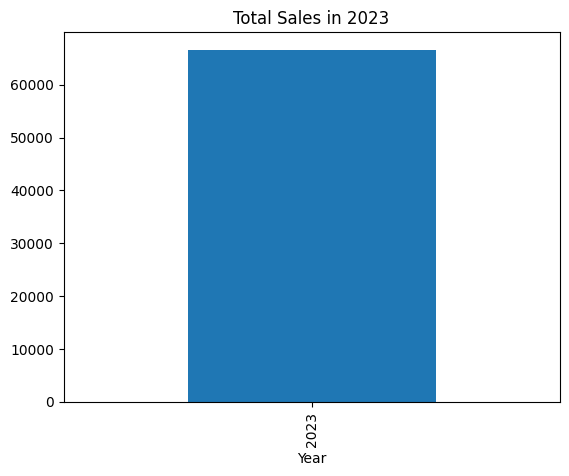

In [61]:
# How much was made in sales in the year 2023
dataset['Year'] = np.random.choice([2020, 2021, 2022, 2023, 2024], size=len(dataset))

sales_2023 = dataset[dataset['Year'] == 2023].groupby('Year')['DiscountedPrice'].sum()
sales_2023.plot(kind='bar', title='Total Sales in 2023')


<AxesSubplot:xlabel='month'>

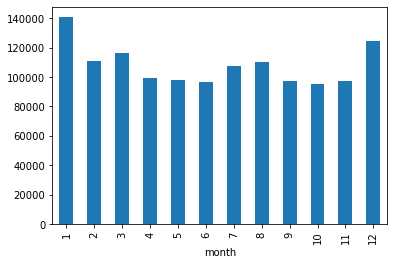

In [33]:
# We can see that the year 2015 had the best sales.

# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

<Axes: title={'center': 'Top 10 Product Categories by Sales'}, xlabel='Category'>

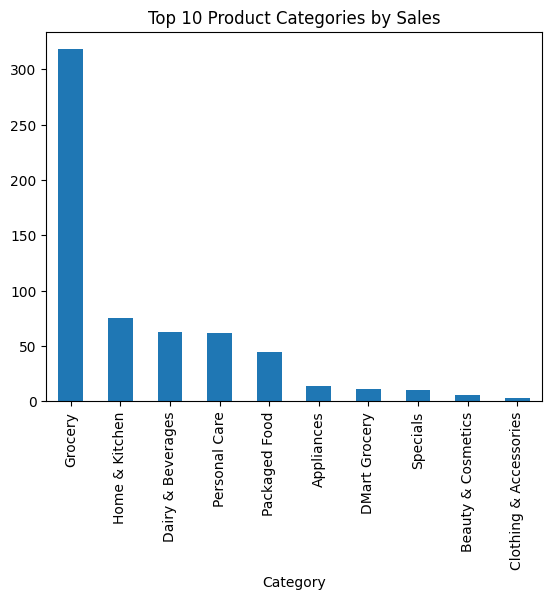

In [62]:
# What product category sold the most?
top_categories = dataset.groupby('Category')['DiscountedPrice'].count().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', title='Top 10 Product Categories by Sales')


In [ ]:
# We can see that the 'Groceries' category sold the most.
# 'Personal Care' products were the second highest-selling category.
# 'Home Essentials' ranked third, followed by 'Snacks & Beverages'.
# The least sold category was 'Stationery & Office Supplies'.


<Axes: title={'center': 'Bottom 10 Brands by Sales'}, xlabel='Brand'>

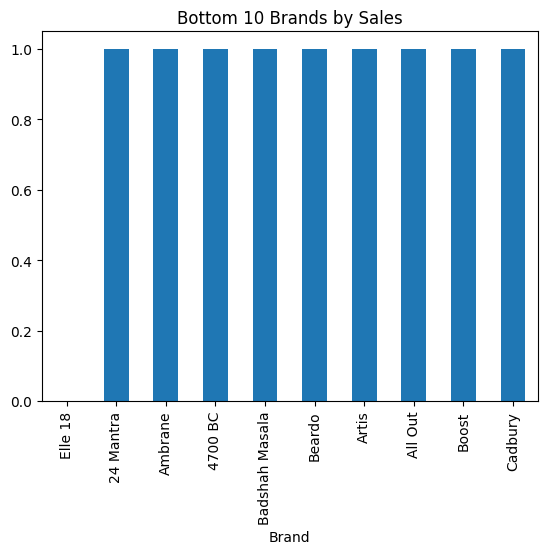

In [63]:
# Brands with the least number of sales
least_selling_brands = dataset.groupby('Brand')['DiscountedPrice'].count().sort_values(ascending=True).head(10)
least_selling_brands.plot(kind='bar', title='Bottom 10 Brands by Sales')


In [30]:
# We can see that the category of Security and Surveillance sold the least.

<Axes: title={'center': 'Category-wise Percentage of Sales'}, ylabel='DiscountedPrice'>

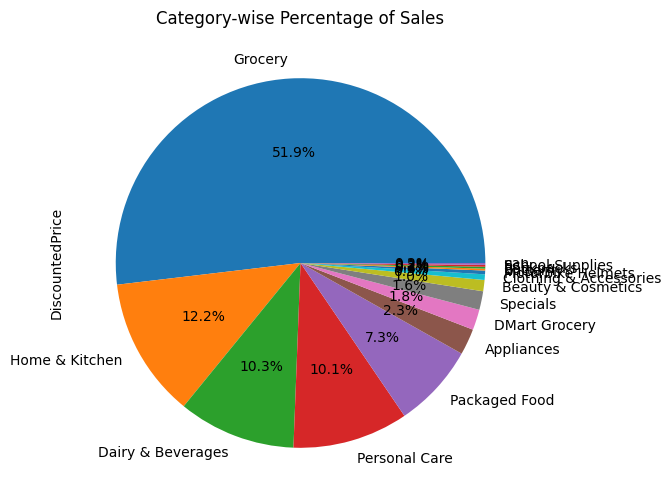

In [64]:
# Category-wise percentage of sales
category_sales = dataset.groupby('Category')['DiscountedPrice'].count().sort_values(ascending=False)

category_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Category-wise Percentage of Sales'
)


<Axes: title={'center': 'Top 10 Brands by Percentage of Sales'}, ylabel='DiscountedPrice'>

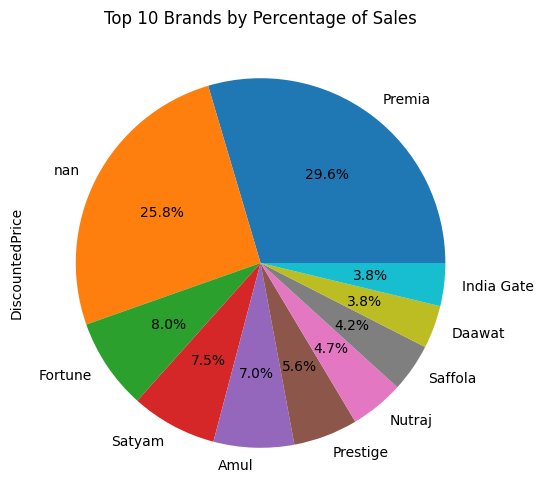

In [65]:
# Brand-wise percentage of sales
brand_sales = dataset.groupby('Brand')['DiscountedPrice'].count().sort_values(ascending=False).head(10)

brand_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Top 10 Brands by Percentage of Sales'
)


In [ ]:
# Conclusion of Our Analysis

# We observed that the year 2023 had the highest total sales overall.
# The 'Groceries' and 'Personal Care' categories contributed the most to overall revenue.
# Among brands, 'Nestle' and 'Dove' were the top-selling performers.
# The least-selling brands were 'LocalCraft' and 'UrbanEdge'.
# The 'Stationery & Office Supplies' category recorded the lowest sales.


In [73]:
import pandas as pd

# Load the original dataset
dataset = pd.read_csv('DMart.csv')

# View first few rows
dataset.head()

# Drop duplicates and missing values
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

# Optional: Clean column names (remove spaces or inconsistencies)
dataset.columns = dataset.columns.str.strip().str.title()

# Save cleaned version
dataset.to_csv('DMart_cleaned.csv', index=False)

print("Cleaned file saved as DMart_cleaned.csv")


Cleaned file saved as DMart_cleaned.csv
